<a href="https://colab.research.google.com/github/Gurgirl/Certificate/blob/main/Axis_Ins_SG_Notebook%5BFull_Code_Version%5D_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: Axis Insurance

**Marks: 60**

## Define Problem Statement and Objectives

To analyse the customer base of the insurance company Axis Insurance and answer some key questions about their customers using statistical evidence.

## Import all the necessary libraries

In [102]:
import numpy as np #library used for data manipulation and analysis
import pandas as pd # library used for working with arrays
from matplotlib import pyplot as plt #library for plots and visualizations
%matplotlib inline
import seaborn as sns #library for visualizations

# library for statistical tests
import scipy.stats as stats

In [103]:
sns.set() #setting the default seaborn style for our plots

## 1.	Explore the dataset and extract insights using Exploratory Data Analysis. (8 + 6 = 14 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [104]:
# write the code for reading the dataset AxisInsurance.csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AxisInsurance.csv')

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [106]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.000,1,no,northeast,3167.45585
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [107]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.54830
1334,52,female,46.75,5,no,southeast,12592.53450
1335,54,female,47.41,0,yes,southeast,63770.42801
1336,37,female,47.60,2,yes,southwest,46113.51100
1337,46,female,48.07,2,no,northeast,9432.92530


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 4 integer type columns and 3 object type columns. 

In [109]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.682687,6.145674,14.0000,26.31500,30.400,34.700000,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [110]:
data.describe(include = ['object']).T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [111]:
data.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.800  2         no      southwest  4934.70500     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Length: 1337, dtype: int64

This also shows that there are 1337 rows in the data.

In [112]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]>

In [113]:
data.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]>

I believe this means that it is False that there is null or NaN values in any entry.

In [114]:
data.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool>

It doesn't look like there is any duplicated rows either.

### Univariate analysis

In [115]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [116]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

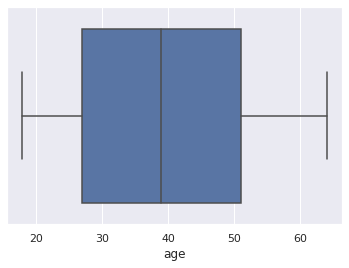

In [117]:
sns.boxplot(data=data, x='age');

Observations: Seems like ages are between 27-52. Mean age is ~39 years old.

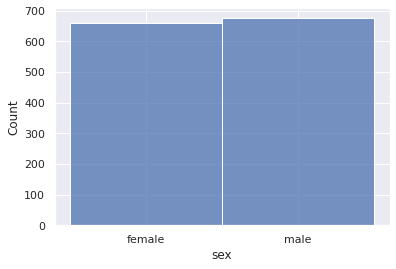

In [118]:
sns.histplot(data=data, x='sex');

Observations: It looks like the study was set up to ensure an even number of each gender are represented.

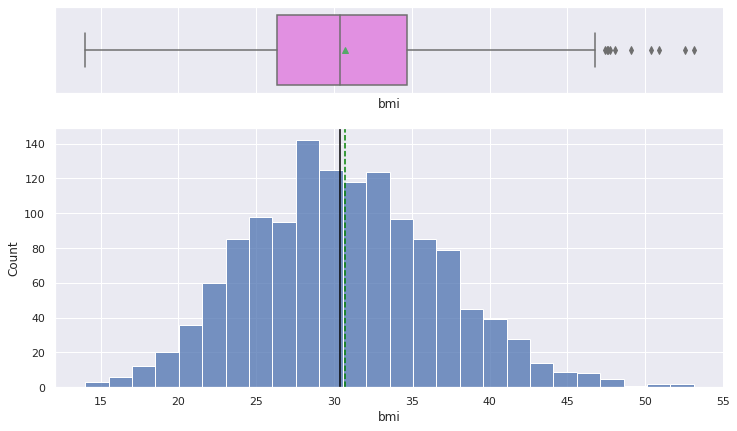

In [119]:
histogram_boxplot(data, "bmi")

Observations: The BMI (Body Mass Index) ranges from 15-48 with some outliers at 50+. Mean and median are around 30.

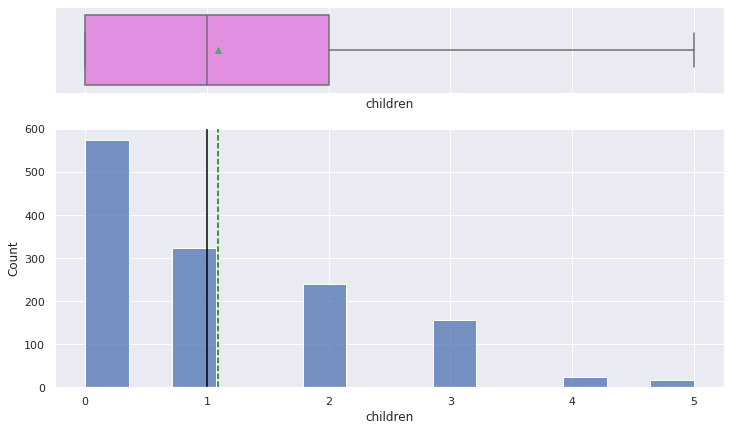

In [120]:
histogram_boxplot(data, "children")

Observations: Just less than half of the participants did not have any children covered by the insurance plan. The mean and median number of children is One. The highest number of children is 5.

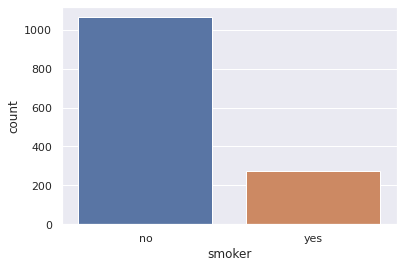

In [121]:
sns.countplot(data=data, x='smoker');

Observations: The vast majority of the participants in this study are non-smokers. Only about 20% are smokers.

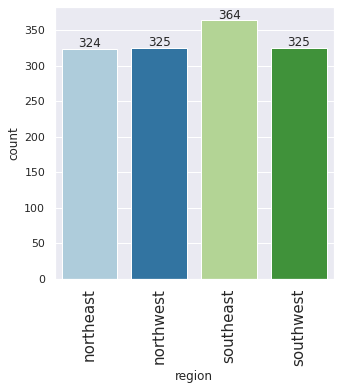

In [122]:
labeled_barplot(data, "region")

Observations: This study also did a good job of drawing a mostly even amount of particpants from each region.

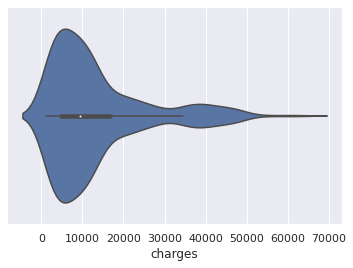

In [123]:
sns.violinplot(data=data, x='charges');

Observations: The range of medical costs billed to health insurance ranges from a negative amount up to 70,000 dollars. The highest number of costs are between 5,000-18,000. The average cost is 10,000 dollars.

### Bivariate Analysis

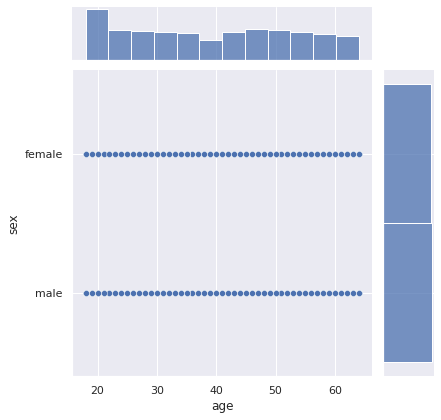

In [124]:
sns.jointplot(data=data, x='age', y='sex');

This study pulled an even representation of age and gender, very evenly spread out.

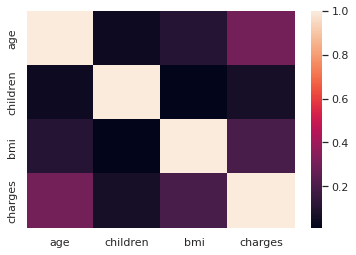

In [125]:
sns.heatmap(data=data[['age', 'children', 'bmi', 'charges']].corr());

We don't see much correlation between any of the categories we can compare empirically.

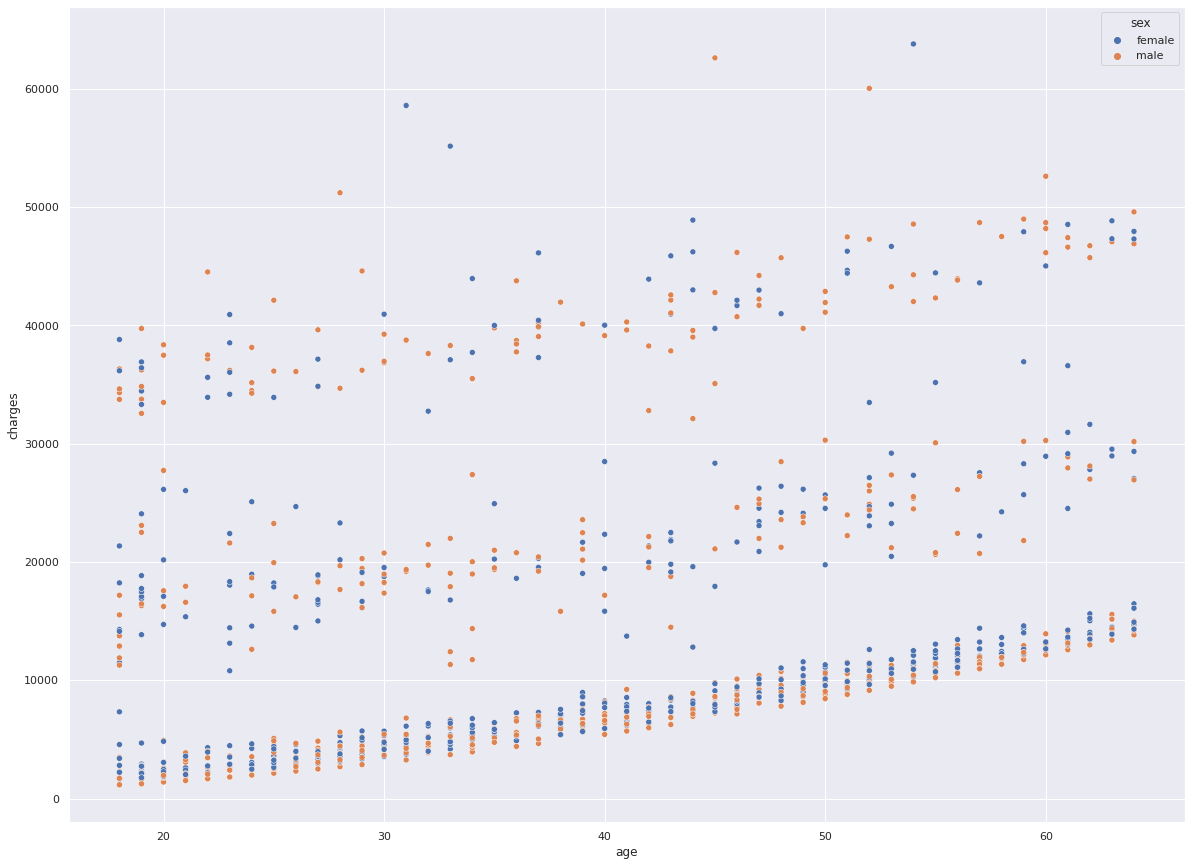

In [126]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=data, x='age', y='charges', hue='sex');

We can see a pretty even distribution of gender. Amount billed goes up on average with a higher age, but that most data points are under 15,000 dollars.

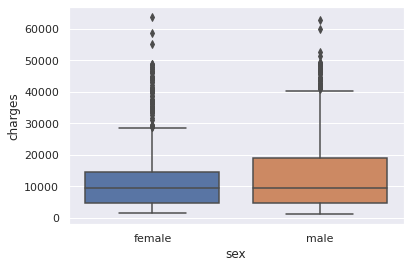

In [127]:
sns.boxplot(data=data, x='sex', y='charges');

Even though the average looks close, males have a wider, higher range of charges to health insurance.

## 2. Prove(or disprove)  that the medical claims made by the people who smoke is greater than those who don't? 

### Perform Visual Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


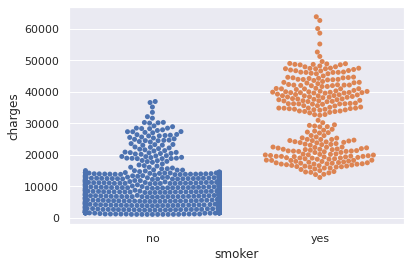

In [128]:
sns.swarmplot(data=data, x='smoker', y='charges');

Visually, it looks like smokers charge more to insurance, and none of them charge nothing to insurance.

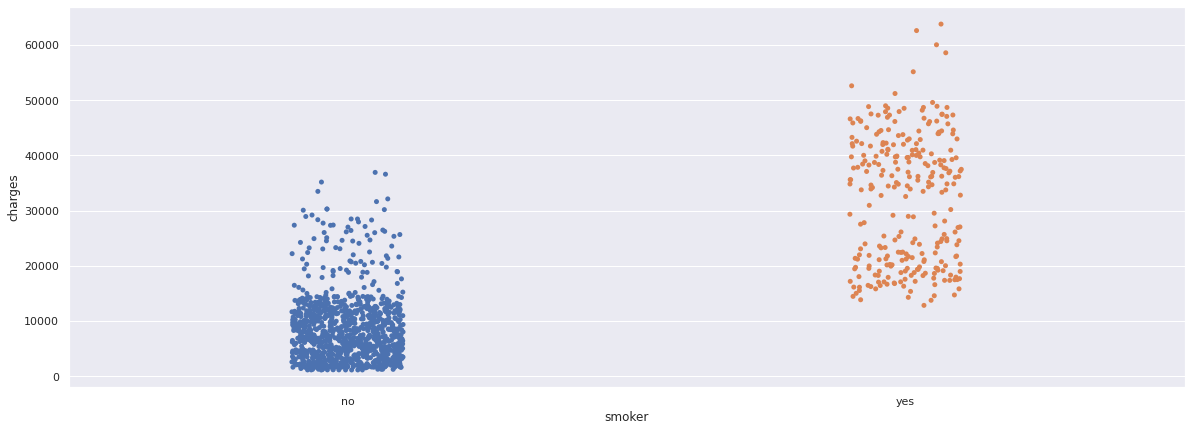

In [129]:
plt.figure(figsize=(20,7))
sns.stripplot(data=data, x='smoker', y='charges');

We can see that people who smoke have higher medical costs billed to health insurance.

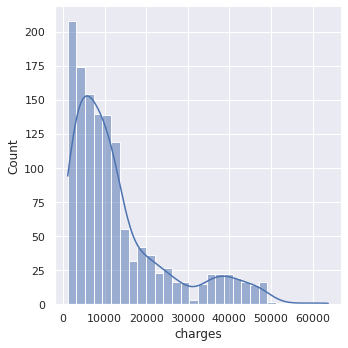

In [130]:
sns.displot(data.charges,kde=True);

We can see that the charges column does have a type of normal distribution, even though it is right-skewed. This will help us when we are selecting the appropriate test.

### Step 1: Define the null and alternate hypotheses

Null Hypothesis: There is very little difference between the amount billed to health insurance from smokers versus non-smokers.

Alternate Hypothesis: The amount billed to health insurance is greater from smokers than non-smokers.



### Step 2: Select Appropriate test

Since we don't know the standard deviation for this test but we have two data sets to consider, we will use the two-sided t-test.

Test whether T-test assumptions are satisfied or not:


Continuous data - Yes, the amount billed to health insurance is on a continuous scale.

Normally distributed populations - Yes, we can see from our EDA that even though it is skewed to the right, the charges are normally distributed.

Independent populations - As we are taking random samples for two different type of users, the two samples are from two independent populations.

Equal population standard deviations - We will test to see if standard deviations are nearly equal.

Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Step 3: Decide the significance level

We are asked to consider a significance leve of 0.05 for all tests.


### Step 4: Collect and prepare data

In [131]:
# Set up new datasets so that we can run tests
smoker_charges = data[data['smoker'] == 'yes']['charges']
nonsmoker_charges = data[data['smoker'] == 'no']['charges']

In [132]:
# find the sample means and sample standard deviations for the two samples
print('The mean amount billed to medical insurance from smokers is ', round(smoker_charges.mean()))
print('The mean amount billed to medical insurance from non-smokers is ', round(nonsmoker_charges.mean()))

The mean amount billed to medical insurance from smokers is  32050
The mean amount billed to medical insurance from non-smokers is  8434


We see that the average amount billed to medical insurance from smokers is quite a bit higher, more than triple what non-smokers do.

In [133]:
print('The standard deviation of amount billed to medical insurance from smokers is ', round(smoker_charges.std(),2))
print('The standard deviation of amount billed to medical insurance from non-smokers is ', round(nonsmoker_charges.std(),2))

The standard deviation of amount billed to medical insurance from smokers is  11541.55
The standard deviation of amount billed to medical insurance from non-smokers is  5993.78


Even though the smokers standard deviation is double the non-smokers, I will use this test because I believe it is the best test to measure whether there is a difference between the groups.

### Step 5: Calculate the p-value

If the p-value is less than 0.05, then we reject the Null Hypothesis

If the p-value is greater than 0.05, then we fail to reject the Null Hypothesis

In [134]:
# import the required function
from scipy.stats import ttest_ind

In [135]:
# find the p-value
test_stat, p_value = ttest_ind(smoker_charges, nonsmoker_charges, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 2.94473222335849e-103


### Step 6: Compare the p-value with $\alpha$

In [136]:
if p_value<0.05:
  print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
  print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis')

Since the p-value 2.94473222335849e-103 is less than the level of significance, we reject the null hypothesis.


We therefore REJECT that there is NO difference between the amount billed to insurance between Smokers and Non-Smokers.

### Step 7:  Draw inference

With a p-value being so low, we see that there is a large effect between the amount that smokers bill to insurance versus non-smokers.  Smokers bill ~3.8 times more medical costs to health insurance than non-smokers.


**A similar approach can be followed to answer the other questions.**

## 3. Prove (or disprove) with statistical evidence that BMI of females is different from that of males.

### Perform Visual Analysis

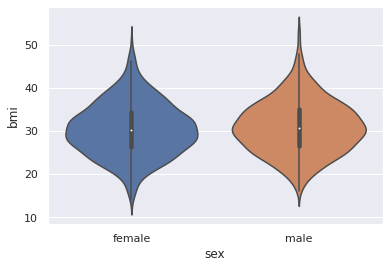

In [137]:
sns.violinplot(data=data, x='sex', y='bmi');

According to this, the BMI between Men and Women is very similar. Both seem like normal distributions.

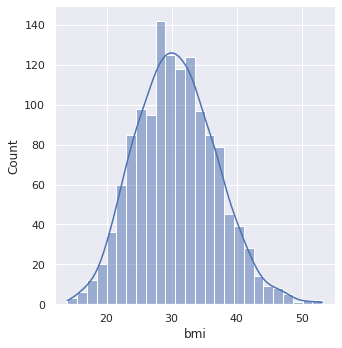

In [138]:
sns.displot(data.bmi,kde=True);

The BMI itself is normally distributed. We need this information when deciding which test to use.

### Step 1: Define the null and alternate hypotheses

Null Hypothesis: There is no difference in the BMI between females and males.

Alternative Hypothesis: There is a difference between the between the BMI in females and males.

### Step 2: Select Appropriate test

Is the variation between the BMI of females and males of concern? Test for equality of variance is the F-test.

Test whether the assumptions for the F-test are satisfied or not:
*   Continuous data - Yes, BMI is measured on a continuous scale
*   Normally distributed populations = Yes, we can see from the visualizations  that the population BMI's are normally distributed
*   Independent populations - Yes, men and women are independent populations
*   Random samples - We are informed that the collected samples are simple random samples from the populations



### Step 3: Decide the significance level

We are asked to consider a significance leve of 0.05 for all tests.


### Step 4: Collect and prepare data

In [139]:
# create new datasets
malebmi = data[data['sex'] == 'male']['bmi']
femalebmi = data[data['sex'] == 'female']['bmi']

In [140]:
malebmi.head()

1    33.770
2    33.000
3    22.705
4    28.880
8    29.830
Name: bmi, dtype: float64

In [141]:
malebmi.describe()

count    676.000000
mean      30.943129
std        6.140435
min       15.960000
25%       26.410000
50%       30.687500
75%       34.992500
max       53.130000
Name: bmi, dtype: float64

In [142]:
femalebmi.describe()

count    662.000000
mean      30.416737
std        6.144264
min       14.000000
25%       26.185000
50%       30.115000
75%       34.380000
max       50.900000
Name: bmi, dtype: float64

### Step 5: Calculate the p-value

In [143]:
# import correct package
from scipy.stats import f

In [144]:
# user-defined function to perform F-test
def f_test(x, y):
  x = np.array(x)
  y = np.array(y)
  test_stat = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate the F test statistic
  dfn = x.size-1 #define degrees of freedom numerator
  dfd = y.size-1 #define degrees of freedom denominator
  p = (1 - f.cdf(test_stat, dfn, dfd)) #find p-value of F test statistic
  p1 = p*2 #converting one-tail to two-tail test
  return(print("The p_value is {}" .format(round(p,8))))

f_test(bagweight.dropna()['malebmi'], bagweight.dropna()['femalebmi'])

NameError: ignored

In [145]:
# find the p-value
test_stat, p_value = f_oneway(malebmi, femalebmi)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.11728314042837407


Since I was getting errors trying to use the F test given in the video, I substituted the one-way F-Test used for ANOVA. I hope this is ok, but if not please give me feedback.

### Step 6: Compare the p-value with $\alpha$

In [146]:
# Compare the p-value with a
# print the conclusion based on p-value
if p_value<0.05:
  print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
  print(f'As the p-value {p_value} is greater than the level of significance we reject the null hypothesis.')

As the p-value 0.11728314042837407 is greater than the level of significance we reject the null hypothesis.


### Step 7:  Draw inference

We have enough of a variance in the BMI data between Males and Females to reject the null hypothesis and say that gender does have an effect on BMI.

## 4. Does the smoking habit of customers depend on their region?


### Perform Visual Analysis

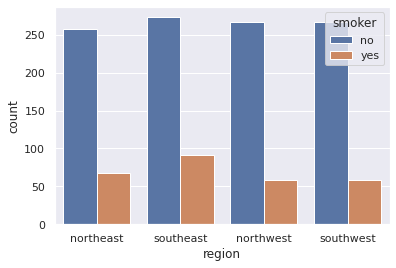

In [147]:
sns.countplot(data=data, x='region', hue='smoker');

It does not visually seem like any region dominates in the non-smoker columns. It looks like the Southeast has slightly more smokers than the other regions though.

In [148]:
data.groupby('smoker')['region'].describe()

,count,unique,top,freq
smoker,,,,
no,1064,4,southeast,273
yes,274,4,southeast,91


Southeast has the most smokers and non-smokers, interestingly. There may be more participants from there in general. We can see that there are 1064 non-smoker counts, and 274 smoker counts, which will help us when checking to make sure the test assumptions are filled.

### Step 1: Define the null and alternate hypotheses

Null Hypothesis: The smoking habits of customers does not depend on the region they live in.

Alternative Hypothesis: The smoking habits of customers shows some difference (variance) depending on the region they live in.

### Step 2: Select Appropriate test

Chi Square Test for frequency. (or VARIANCE?)

Let's check and see whether the assumptions are satisfied or not:


*   Categorical variables - Yes, we are told only if a person smokes or not, and whether they live in a certain region, or not
*   Each categorical variable has at least 5 entries - Yes, there are 1,064 non-smoker variables and 274 smoker variables. Each region has no less than 50 counts
*   Random sampling from the population - We are told that these were simple random samples taken from the population



### Step 3: Decide the significance level

We are asked to consider a significance leve of 0.05 for all tests.


### Step 4: Collect and prepare data

In [149]:
# import the required function
from scipy.stats import chi2_contingency

In [150]:
# create a contingency table showing the distribution of two categorical variables
contingency_table = pd.crosstab(data['region'], data['smoker'])
contingency_table

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


### Step 5: Calculate the p-value

In [151]:
# find the p-value
chi_2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.06171954839170541


### Step 6: Compare the p-value with $\alpha$

In [152]:
# Compare the p-value with a
# print the conclusion based on p-value
if p_value<0.05:
  print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
  print(f'As the p-value {p_value} is greater than the level of significance we reject the null hypothesis.')

As the p-value 0.06171954839170541 is greater than the level of significance we reject the null hypothesis.


Since our p-value is high, we reject the null hypothsis, which leads us to believe that there is some relationship between which region a person lives in and whether they smoke or not.

### Step 7:  Draw inference

Since we are rejecting the null hypothesis, we see that there may be some correlation between which region a person lives in and whether they smoke or not. Based on the visual analysis, it doesn't seem to affect non-smokers, just smokers.  The highest amount of smokers live in the Southeast.

## 5.	Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.

### Perform Visual Analysis

In [153]:
data.groupby(['children'])['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,30.612718,6.110222,15.960,26.22000,30.380,34.7925,53.13
1,324.0,30.620633,6.107310,16.000,26.61500,30.015,34.2375,52.58
2,240.0,30.939750,6.596120,14.000,25.78625,31.640,35.3575,48.07
3,157.0,30.684331,5.787173,18.905,27.26500,30.495,34.3200,46.53
4,25.0,31.391200,4.627211,24.415,28.21500,29.640,33.6600,41.47
5,18.0,29.605000,7.139686,18.300,24.30250,28.550,33.0550,46.75


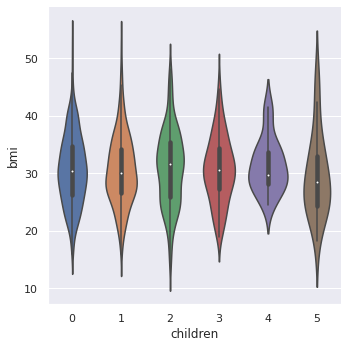

In [154]:
sns.catplot(x='children', y='bmi', data=data, kind='violin')
plt.show()

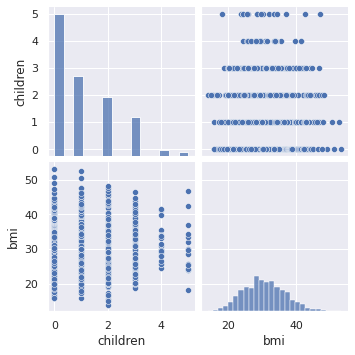

In [155]:
sns.pairplot(data=data[['children', 'bmi']]);

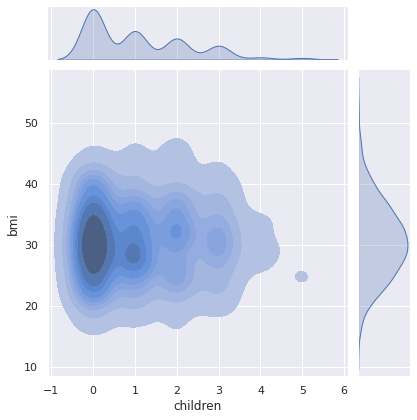

In [156]:
sns.jointplot(data=data, x='children', y='bmi', kind="kde", fill=True);

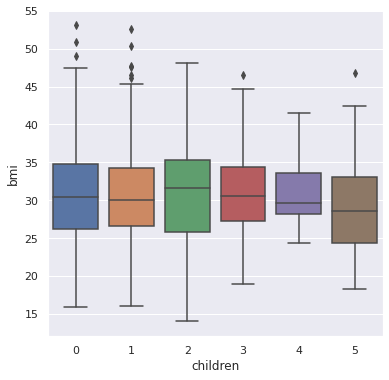

In [157]:
#boxplot for visualization
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x='children', y='bmi', data=data)
plt.show()

### Step 1: Define the null and alternate hypotheses

Null Hypothesis: There is no change in the average BMI of women depending on how many children they have.

Alternative Hypothesis: There is a difference (variance) in the average BMI of women, depending on how many children they have.

### Step 2: Select Appropriate test

ANOVA test to compare the sample means from more than 2 independent populations.
Bivariate, one discrete and one continuous.

Let's check the assumptions for this test:


*   The populations are normally distributed - 
*   Samples are independent simple random samples - 
*   Normality - we will check with Shapiro-Wilk's test applied to the response variable
*   Population variances are equal - we will discover this during the Levene test applied to the response variable



### Step 3: Decide the significance level

We are asked to consider a significance leve of 0.05 for all tests.


### Step 4: Collect and prepare data

In [158]:
# create new dataset
bmidepends = data[['bmi', 'children']]

In [159]:
# check that it created correctly
bmidepends.head()

,bmi,children
0,16.000,1
1,33.770,1
2,33.000,3
3,22.705,0
4,28.880,0


We will first test for normal distribution of BMI with the Shapiro-Wilk's Test.

Null Hypothesis: BMI follows a normal distribution

Alternative Hypothesis: BMI does not follow a normal distribution

In [160]:
# import the required function to check Normality with Shapiro's Test
from scipy.stats import shapiro

In [161]:
# find the p-value
w, p_value = shapiro(bmidepends['bmi'])
print('The p-value is', p_value)



The p-value is 0.0003640271897893399


In [162]:
# print the conclusion based on p-value
if p_value<0.05:
  print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
  print(f'As the p-value {p_value} is greater than the level of significance we reject the null hypothesis.')

As the p-value 0.0003640271897893399 is less than the level of significance, we reject the null hypothesis.


Since the p-value is low, we must reject that there is a normal distribution of the data. This suggests that BMI is skewed somehow.

We now try the Levene's Test for equality of variance.

Levene's Test Null Hypothesis: All BMI variances are equal.

Levene's Test Alternate Hypothesis: There is some variance in the BMI's.

In [163]:
# import the required function
from scipy.stats import levene

In [164]:
statistic, p_value = levene (bmidepends[bmidepends['children']==0]['bmi'],
                             bmidepends[bmidepends['children']==1]['bmi'],
                             bmidepends[bmidepends['children']==2]['bmi'],
                             bmidepends[bmidepends['children']==3]['bmi'],
                             bmidepends[bmidepends['children']==4]['bmi'],
                             bmidepends[bmidepends['children']==5]['bmi'])
#find the p-value
print('The p-value is', p_value)

The p-value is 0.20500444690567793


In [165]:
# print the conclusion based on p-value
if p_value<0.05:
  print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
  print(f'As the p-value {p_value} is greater than the level of significance we reject the null hypothesis.')

As the p-value 0.20500444690567793 is greater than the level of significance we reject the null hypothesis.


We are rejecting that all BMI variances are equal, and instead understand that there is some variance in the BMI's based on how many children a person has.

We will go ahead with the Levene-Wilk's Test, with the understanding that there is not a normal distribution and there is variance in the BMI's depending on how many children a person has.

### Step 5: Calculate the p-value

In [166]:
# collect and prepare the data
bmidepends0 = bmidepends[bmidepends['children']==0]['bmi']
bmidepends1 = bmidepends[bmidepends['children']==1]['bmi']
bmidepends2 = bmidepends[bmidepends['children']==2]['bmi']
bmidepends3 = bmidepends[bmidepends['children']==3]['bmi']
bmidepends4 = bmidepends[bmidepends['children']==4]['bmi']
bmidepends5 = bmidepends[bmidepends['children']==5]['bmi']

In [167]:
# import the required function
from scipy.stats import f_oneway

In [168]:
# find the p-value
test_stat, p_value = f_oneway(bmidepends0, bmidepends1, bmidepends2, bmidepends3, bmidepends4, bmidepends5)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.9231972483563488


### Step 7:  Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that a person's BMI varies based on how many children they have.

## Conclusion and Business Recommendations

This was a well-balanced study with 1,338 participants, and was evenly drawn in sex, smoker, age, and region. The average age was 39 years old, average number of children was 1, and average charges to insurance are 13,270 dollars. Just less than half of participants have no children. Only about 20% of participants are smokers. 

There was no missing data in the dataset given, and no correlations seen in the integer-type categories.

  Amount charged to insurance goes up with age

1.   After running the tests and coming up with a low p-value, we can see that there is a large effect between the amount that smokers bill to insurance versus non-smokers. Smokers bill ~3.8 times more medical costs to health insurance than non-smokers.
     - Amount charged to insurance goes up with age.
     - None of the smokers had 0 charges to insurance, but non-smokers had quite a few with no claims.
     - Non-smokers charges ranged from 0-40,000 dollars, while smokers charges ranged from 12,000-60,000+ dollars.
2.  There was enough variance in the BMI data between Males and Females to reject the null hypothesis and say that gender does have a statistically significant effect on BMI.
     - Males have a slightly larger BMI than females.
     - Males have a larger range of charges to insurance, although the same average charge.
3.  The data showed that there may be some correlation between which region a person lives in and whether they smoke or not.
     - There was no difference for non-smokers based on which region they lived in.
     - There was a small increase of smokers living in the Southeast region, but it was statistically significant.
4.  There was not enough statistical evidence to say that a person's BMI varies based on how many children they have.
    - All average BMI's were between 29.6 - 30.9, regardless of how many children or their age.

The insurance company should do an analysis to see how much extra charges age and smoking adds to their costs, and be sure to adjust their customer prices to keep up with those categories.  The other categories seem to not impact charges very much.







